# Assignment 12 - Neural Networks image recognition
Use both MLNN and the ConvNet to solve the following problem.

1. Add random noise (i.e. `np.random.normal`) to the images in training and testing. Make sure each image gets a different noise feature added to it. Inspect by printing out an image. 
2. Compare the loss/accuracy (train, val) after N epochs for both MLNN and ConvNet with and without noise. 
3. Vary the amount of noise (multiply `np.random.normal` by a factor) and keep track of the accuracy and loss (for training and validation) and plot these results.

# Neural Networks - Image Recognition 

In [19]:
import keras
from keras import backend
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("Success")

Success


## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

60000 train samples
10000 test samples


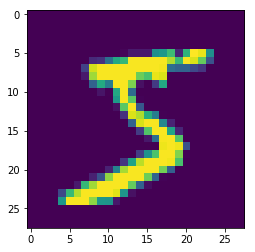

In [5]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0])

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [3]:
epochs = 20
batch_size = 128
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2442 

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 103s 2ms/step - loss: 0.2689 - acc: 0.9164 - val_loss: 0.0645 - val_acc: 0.9781
Epoch 2/12
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0926 - acc: 0.9718 - val_loss: 0.0427 - val_acc: 0.9856
Epoch 3/12
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0689 - acc: 0.9798 - val_loss: 0.0401 - val_acc: 0.9855
Epoch 4/12
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0542 - acc: 0.9836 - val_loss: 0.0338 - val_acc: 0.9883
Epoch 5/12
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0484 - acc: 0.9853 - val_loss: 0.0292 - val_acc: 0.9901
Epoch 6/12
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0435 - acc: 0.9868 - val_loss: 0.0302 - val_acc: 0.9898
Epoch 7/12
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0393 - acc: 0.9879 - val_loss: 0.0276 - 

In [22]:
## With noise added

60000 train samples
10000 test samples


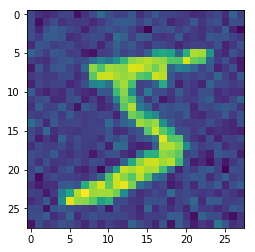

In [25]:
# Adding noise to the image
(noisy_xtrain, noisy_ytrain), (noisy_xtest, noisy_ytest) = mnist.load_data()
noisy_xtrain = noisy_xtrain+np.random.normal(noisy_xtrain, 50)
noisy_xtest = noisy_xtest+np.random.normal(noisy_xtest, 50)
plt.imshow(noisy_xtrain[0])

noisy_xtrain = noisy_xtrain.reshape(60000, 784)
noisy_xtest = noisy_xtest.reshape(10000, 784)
noisy_xtrain = noisy_xtrain.astype('float32')
noisy_xtest = noisy_xtest.astype('float32')
noisy_xtrain /= 255
noisy_xtest /= 255
print(noisy_xtrain.shape[0], 'train samples')
print(noisy_xtest.shape[0], 'test samples')

In [26]:
epochs = 20
batch_size = 128
num_classes = 10

noisy_ytrain = keras.utils.to_categorical(noisy_ytrain, num_classes)
noisy_ytest = keras.utils.to_categorical(noisy_ytest, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(noisy_xtrain, noisy_ytrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(noisy_xtest, noisy_ytest))
score50 = model.evaluate(noisy_xtest, noisy_ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.2647 

In [32]:
print(score50)

[0.2025147488194846, 0.9757]


In [72]:
parameters = range(0, 100, 10)
epochs = 20
batch_size = 128
num_classes = 10
allscores=[]

for x in parameters:
    (noisy_xtrain, noisy_ytrain), (noisy_xtest, noisy_ytest) = mnist.load_data()
    noisy_xtrain = noisy_xtrain+np.random.normal(noisy_xtrain, x)
    noisy_xtest = noisy_xtest+np.random.normal(noisy_xtest, x)
    print(x)

    noisy_xtrain = noisy_xtrain.reshape(60000, 784)
    noisy_xtest = noisy_xtest.reshape(10000, 784)
    noisy_xtrain = noisy_xtrain.astype('float32')
    noisy_xtest = noisy_xtest.astype('float32')
    noisy_xtrain /= 255
    noisy_xtest /= 255
    noisy_ytrain = keras.utils.to_categorical(noisy_ytrain, num_classes)
    noisy_ytest = keras.utils.to_categorical(noisy_ytest, num_classes)

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

    history = model.fit(noisy_xtrain, noisy_ytrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(noisy_xtest, noisy_ytest))
    x = model.evaluate(noisy_xtest, noisy_ytest, verbose=0)
    allscores.append(x)
    

0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.24

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.2485 - acc: 0.9233 - val_loss: 0.1151 - val_acc: 0.9629
Epoch 2/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1034 - acc: 0.9688 - val_loss: 0.0924 - val_acc: 0.9723
Epoch 3/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0721 - acc: 0.9785 - val_loss: 0.0783 - val_acc: 0.9765
Epoch 4/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0538 - acc: 0.9841 - val_loss: 0.0814 - val_acc: 0.9790
Epoch 5/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0467 - acc: 0.9860 - val_loss: 0.0920 - val_acc: 0.9784
Epoch 6/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0364 - acc: 0.9889 - val_loss: 0.1064 - val_acc: 0.9760
Epoch 7/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0325 - acc: 0.9901 - val_loss: 0.1038 - val_acc

Epoch 5/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0365 - acc: 0.9885 - val_loss: 0.1143 - val_acc: 0.9763
Epoch 6/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0308 - acc: 0.9904 - val_loss: 0.1576 - val_acc: 0.9698
Epoch 7/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0275 - acc: 0.9921 - val_loss: 0.1267 - val_acc: 0.9767
Epoch 8/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0252 - acc: 0.9927 - val_loss: 0.1207 - val_acc: 0.9796
Epoch 9/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0229 - acc: 0.9937 - val_loss: 0.1248 - val_acc: 0.9795
Epoch 10/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0188 - acc: 0.9949 - val_loss: 0.1459 - val_acc: 0.9774
Epoch 11/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0191 - acc: 0.9945 - val_loss: 0.1288 - val_acc: 0.9798
Epoch 12/20
60000/60000 [==============

60000/60000 [==============================] - 6s 96us/step - loss: 0.0211 - acc: 0.9940 - val_loss: 0.1573 - val_acc: 0.9751
Epoch 10/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0194 - acc: 0.9947 - val_loss: 0.1662 - val_acc: 0.9737
Epoch 11/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0195 - acc: 0.9947 - val_loss: 0.1763 - val_acc: 0.9735
Epoch 12/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0164 - acc: 0.9956 - val_loss: 0.1790 - val_acc: 0.9745
Epoch 13/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0144 - acc: 0.9960 - val_loss: 0.1881 - val_acc: 0.9744
Epoch 14/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0138 - acc: 0.9966 - val_loss: 0.1808 - val_acc: 0.9739
Epoch 15/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0156 - acc: 0.9958 - val_loss: 0.1774 - val_acc: 0.9753
Epoch 16/20
60000/60000 [====================

60000/60000 [==============================] - 5s 89us/step - loss: 0.0130 - acc: 0.9963 - val_loss: 0.2152 - val_acc: 0.9714
Epoch 14/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0130 - acc: 0.9966 - val_loss: 0.2315 - val_acc: 0.9697
Epoch 15/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0141 - acc: 0.9964 - val_loss: 0.2245 - val_acc: 0.9714
Epoch 16/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0130 - acc: 0.9969 - val_loss: 0.2110 - val_acc: 0.9725
Epoch 17/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0137 - acc: 0.9968 - val_loss: 0.2362 - val_acc: 0.9705
Epoch 18/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0134 - acc: 0.9968 - val_loss: 0.2248 - val_acc: 0.9713
Epoch 19/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0126 - acc: 0.9970 - val_loss: 0.2330 - val_acc: 0.9724
Epoch 20/20
60000/60000 [=====================

In [73]:
print(allscores)

[[0.12360782584783851, 0.9818], [0.1122552095077423, 0.9851], [0.13355721265197434, 0.982], [0.13709209497759575, 0.9817], [0.18334609402565025, 0.9779], [0.1781390108602849, 0.9772], [0.1990449488847319, 0.9764], [0.22120912985443997, 0.9747], [0.246294115037751, 0.9715], [0.25350026728553304, 0.97]]


<function matplotlib.pyplot.show(*args, **kw)>

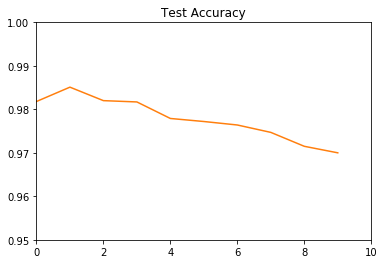

In [82]:
plt.plot(allscores)
plt.title('Test Accuracy')
plt.axis([0,10,.95, 1])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

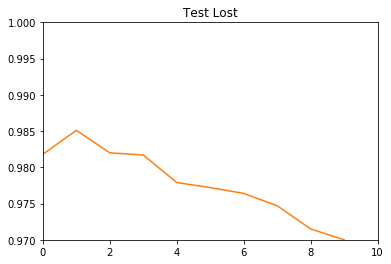

In [80]:
plt.plot(allscores)
plt.title('Test Lost')
plt.axis([0,10,.97, 1])
plt.show